In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

## 2.5R$_{\text{Eff}}$

In [2]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos

    # intrinsic
Dstar  = np.empty([Nsubhalos,3])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,3])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,3])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,3])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction


In [3]:
    # Where to store the results
MMstar_jam    = np.empty([Nsubhalos, 3])        # JAM measurement of stellar mass 
MMstar_dyLens = np.empty([Nsubhalos, 3])        # dyLens measurement of stellar mass
MMstar_dyLens_shear = np.empty([Nsubhalos, 3])  # dyLens+shear measurement of stellar mass

MMtotal_jam    = np.empty([Nsubhalos, 3])       # JAM measurement of total mass 
MMtotal_dyLens = np.empty([Nsubhalos, 3])       # dyLens measurement of total mass 
MMtotal_dyLens_shear = np.empty([Nsubhalos, 3]) # dyLens+shear measurement of total mass 

MMdm_jam    = np.empty([Nsubhalos, 3])          # JAM measurement of dark matter mass
MMdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter mass
MMdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter mass

MMfdm_jam    = np.empty([Nsubhalos, 3])          # JAM measurement of dark matter fraction
MMfdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter fraction
MMfdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter fraction
    


In [4]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        jam = json.load(f)
        f.close()
    
    with open("./{}/model1/no_shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()

    with open("./{}/model1/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        dyLens_shear = json.load(f)
        f.close()
    
    Dstar[i][0] = jam["Dstar"]
    Dstar[i][1] = dyLens["Dstar"]
    Dstar[i][2] = dyLens_shear["Dstar"]
    
    Ddm[i][0] = jam["Ddm"]
    Ddm[i][1] = dyLens["Ddm"]
    Ddm[i][2] = dyLens_shear["Ddm"]
    
    Dtotal[i][0] = jam["Dtotal"]
    Dtotal[i][1] = dyLens["Dtotal"]
    Dtotal[i][2] = dyLens_shear["Dtotal"]
    
    Dfdm[i][0] = jam["Dfdm"]
    Dfdm[i][1] = dyLens["Dfdm"]
    Dfdm[i][2] = dyLens_shear["Dfdm"]    
    
    Mstar[i]  = dyLens["Mstar"]
    Mdm[i]    = dyLens["Mdm"]
    Mtotal[i] = dyLens["Mtotal"] 
    Mfdm[i]   = dyLens["fdm"]
    
    MMstar_jam[i]    = jam["MMstar"]
    MMstar_dyLens[i] = dyLens["MMstar"]
    MMstar_dyLens_shear[i] = dyLens_shear["MMstar"]
    
    MMtotal_jam[i]    = jam["MMtotal"]
    MMtotal_dyLens[i] = dyLens["MMtotal"]
    MMtotal_dyLens_shear[i] = dyLens_shear["MMtotal"]
    
    MMdm_jam[i]    = jam["MMdm"]
    MMdm_dyLens[i] = dyLens["MMdm"]
    MMdm_dyLens_shear[i] = dyLens_shear["MMdm"]
    
    MMfdm_jam[i]    = jam["Mfdm"]
    MMfdm_dyLens[i] = dyLens["Mfdm"]
    MMfdm_dyLens_shear[i] = dyLens_shear["Mfdm"]
    


In [5]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

def make_plot(dataset_true, dataset_jam, dataset_dyLens, dataset_dyLens_shear,
                 diff_dataset,
                 title, label, fdm=False):

    plt.figure(figsize=(15,8))
    plt.suptitle(title, fontsize=14)

    plt.subplot(121)
    MM_jam_u          = np.diff(dataset_jam, axis=1)
    MM_dyLens_u       = np.diff(dataset_dyLens, axis=1)
    MM_dyLens_shear_u = np.diff(dataset_dyLens_shear, axis=1)

    plt.scatter(x=dataset_true, y=dataset_jam[:,1], s=10, color="blue", label="Dynamics only")
    plt.errorbar(x=dataset_true, y=dataset_jam[:,1], yerr=MM_jam_u.T, ls="None", color="blue")

    plt.scatter(x=dataset_true, y=dataset_dyLens[:,1], s=10, color="orange", label="dyLens")
    plt.errorbar(x=dataset_true, y=dataset_dyLens[:,1], yerr=MM_dyLens_u.T, ls="None", color="orange")

    plt.scatter(x=dataset_true, y=dataset_dyLens_shear[:,1], s=10, color="green", label="dyLens+shear")
    plt.errorbar(x=dataset_true, y=dataset_dyLens_shear[:,1], yerr=MM_dyLens_shear_u.T, ls="None", color="green")

    r = np.linspace(dataset_true.min(), dataset_true.max())
    plt.plot(r, r, color="gray", linestyle="--")

    plt.legend(fontsize=13)
    if fdm:
        plt.xlabel(r"Input $f_{DM}$",  size=14)
        plt.ylabel(r"Output $f_{DM}$",  size=14)
    else:       
        plt.xlabel(r"Input [${\log_{10}(M/M_{\odot})}]$",  size=14)
        plt.ylabel(r"Output [${\log_{10}(M/M_{\odot})}]$",  size=14)



    plt.subplot(122)
    m, hi, lo = median_hi_lo(diff_dataset[:,0])
    _ = plt.hist(Dstar[:,0], bins=5, density=False,  color="blue",
                 label="Dynamics only: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    m, hi, lo = median_hi_lo(diff_dataset[:,1])
    _ = plt.hist(Dstar[:,1], bins=5, density=False, alpha=0.8, color="orange",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    m, hi, lo = median_hi_lo(diff_dataset[:,2])
    _ = plt.hist(Dstar[:,2], bins=5, density=False, alpha=0.8, color="green",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    plt.legend(fontsize=13)
    plt.xlabel(label, size=14)
    plt.ylabel("#Number of subhalos", size=14)

    plt.xticks(size=12)
    plt.yticks(size=12)


    plt.tight_layout()

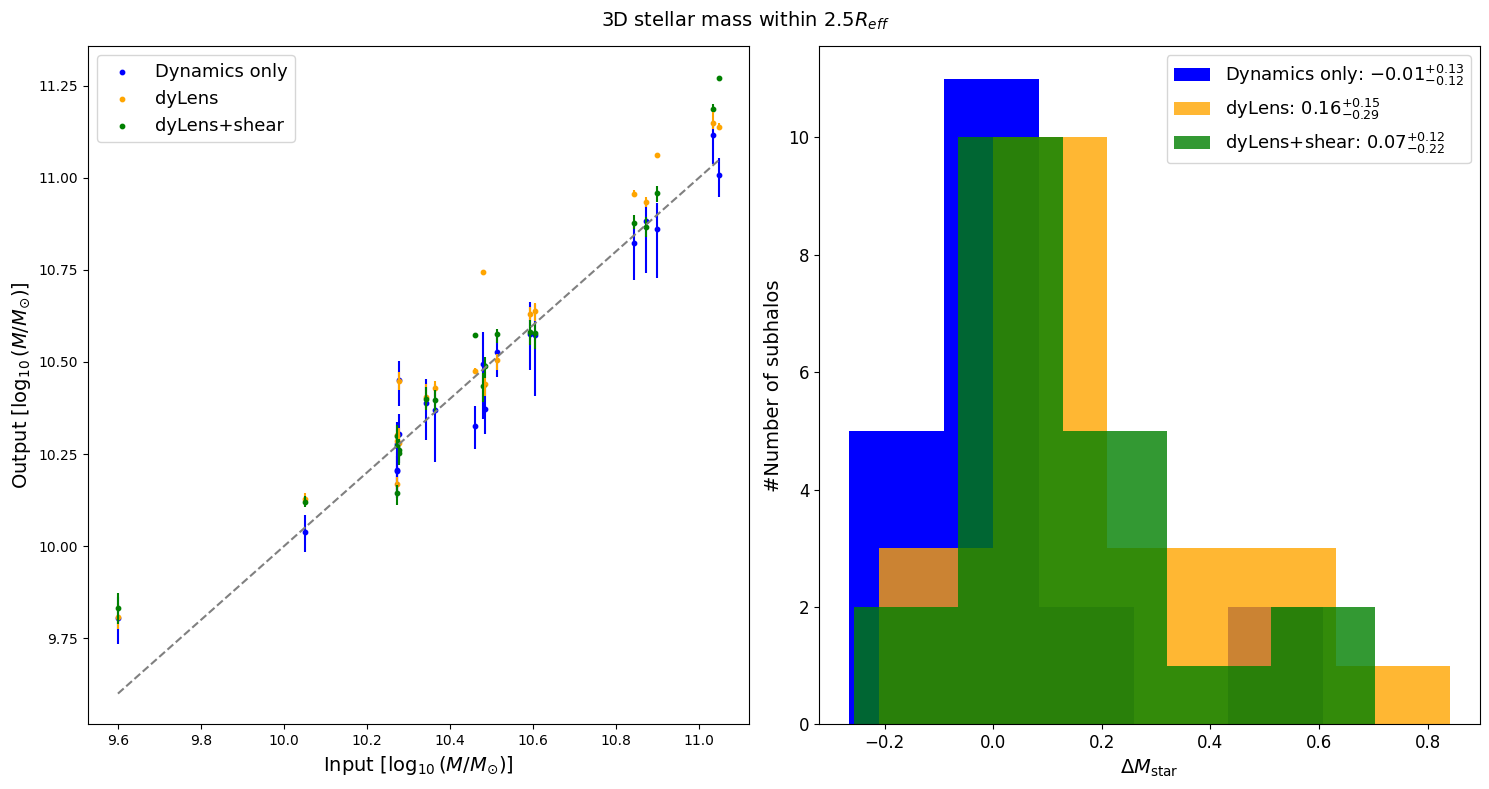

In [6]:
    # Stellar mass plot
make_plot(dataset_true=Mstar,
          dataset_jam=MMstar_jam, 
          dataset_dyLens=MMstar_dyLens, 
          dataset_dyLens_shear=MMstar_dyLens_shear,
          diff_dataset=Dstar,
         title=r"3D stellar mass within $2.5R_{eff}$", label=r"${\Delta M_{\rm star}}$")

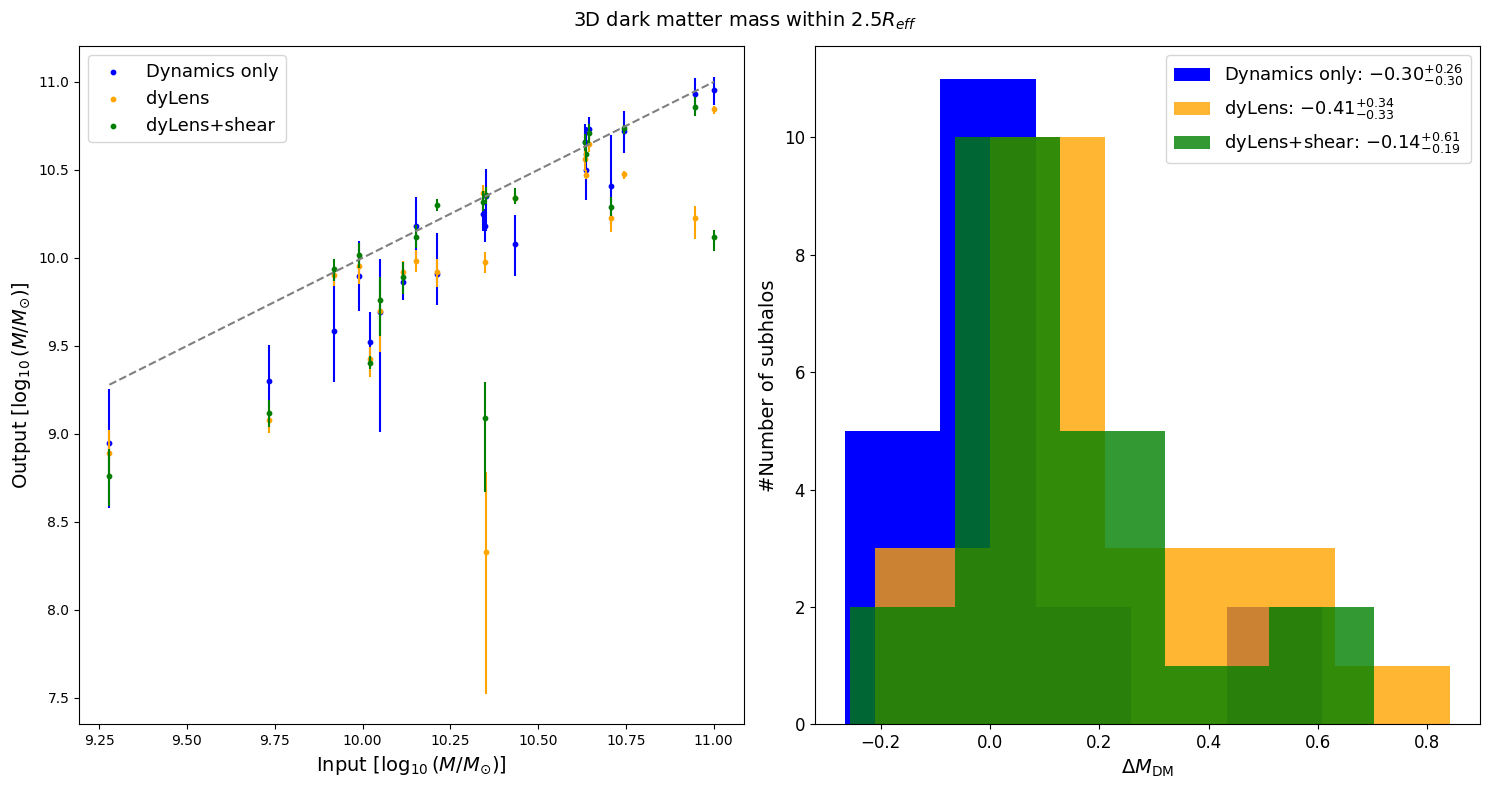

In [7]:
    # Dark matter mass
make_plot(dataset_true=Mdm,
          dataset_jam=MMdm_jam, 
          dataset_dyLens=MMdm_dyLens,
          dataset_dyLens_shear=MMdm_dyLens_shear,
          diff_dataset=Ddm,
         title=r"3D dark matter mass within $2.5R_{eff}$", label=r"${\Delta M_{\rm DM}}$")

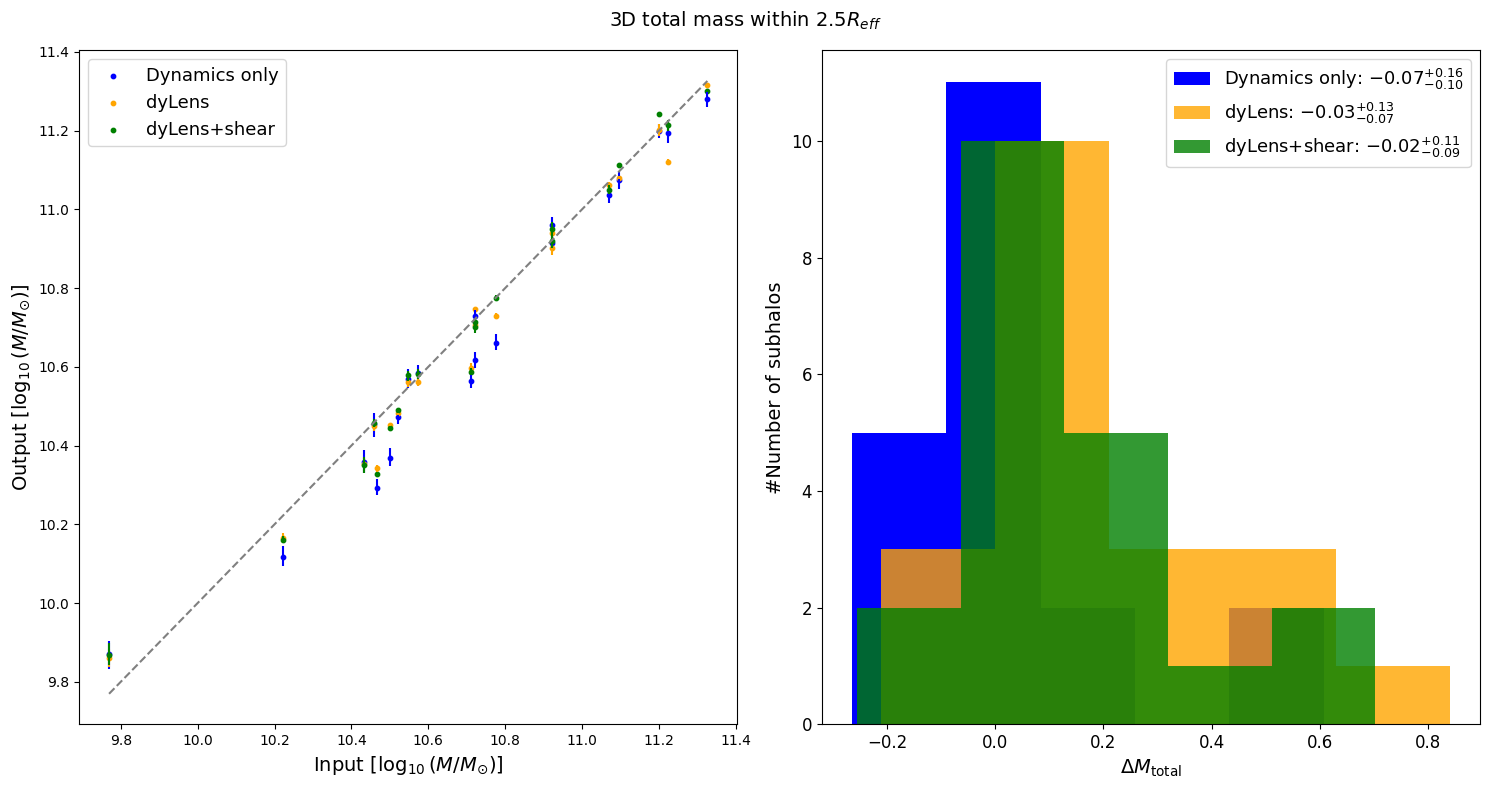

In [8]:
    # Total mass
make_plot(dataset_true=Mtotal,
          dataset_jam=MMtotal_jam, 
          dataset_dyLens=MMtotal_dyLens,
          dataset_dyLens_shear=MMtotal_dyLens_shear,
          diff_dataset=Dtotal,
         title=r"3D total mass within $2.5R_{eff}$", label=r"${\Delta M_{\rm total}}$")

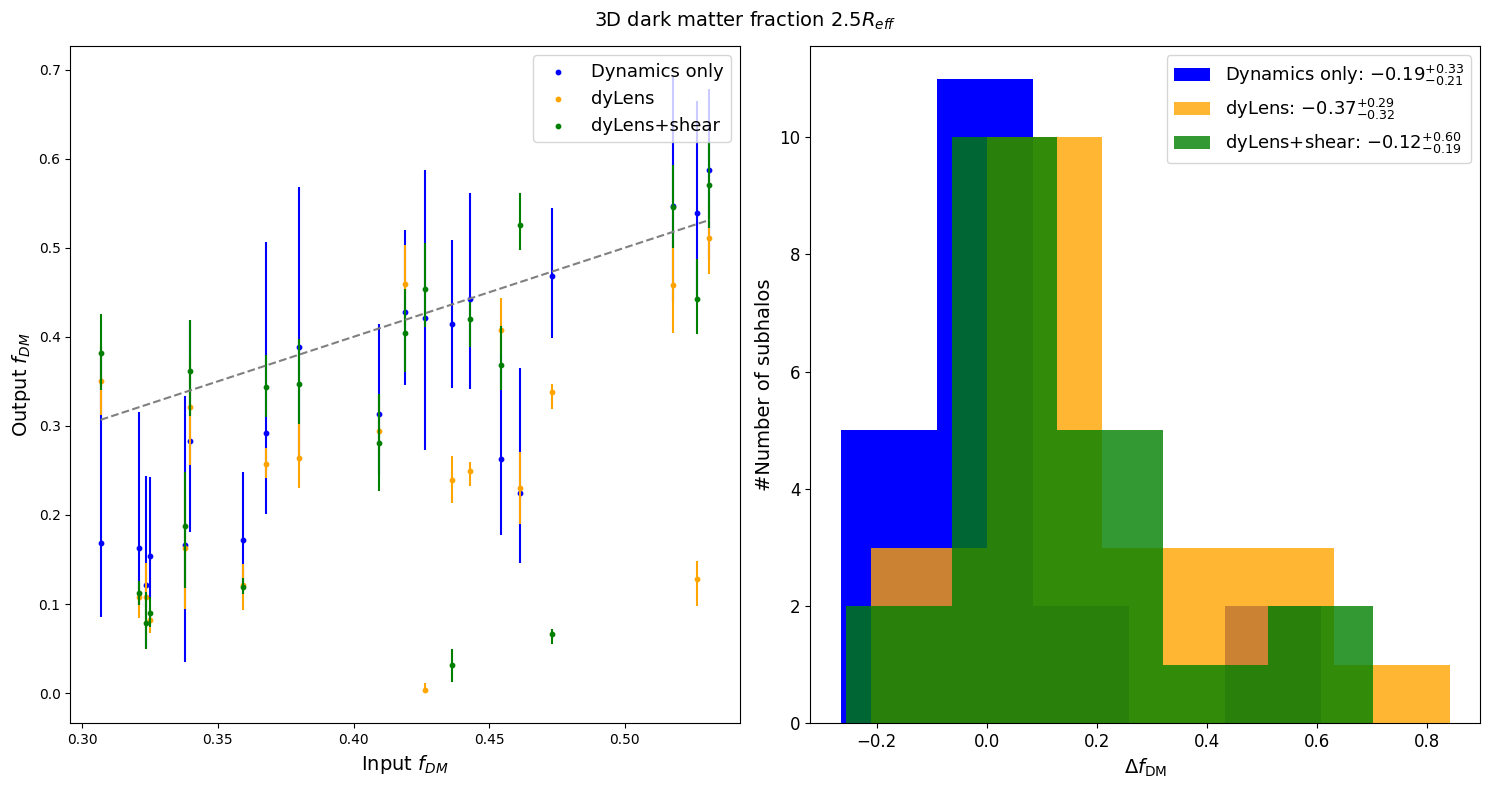

In [10]:
    # Dark matter fraction
make_plot(dataset_true=Mfdm,
          dataset_jam=MMfdm_jam, 
          dataset_dyLens=MMfdm_dyLens,
          dataset_dyLens_shear=MMfdm_dyLens_shear,
          diff_dataset=Dfdm,
         title=r"3D dark matter fraction $2.5R_{eff}$", label=r"${\Delta f_{\rm DM}}$", fdm=True)

In [11]:
results_3D = np.stack([Dstar, Ddm, Dtotal, Dfdm])

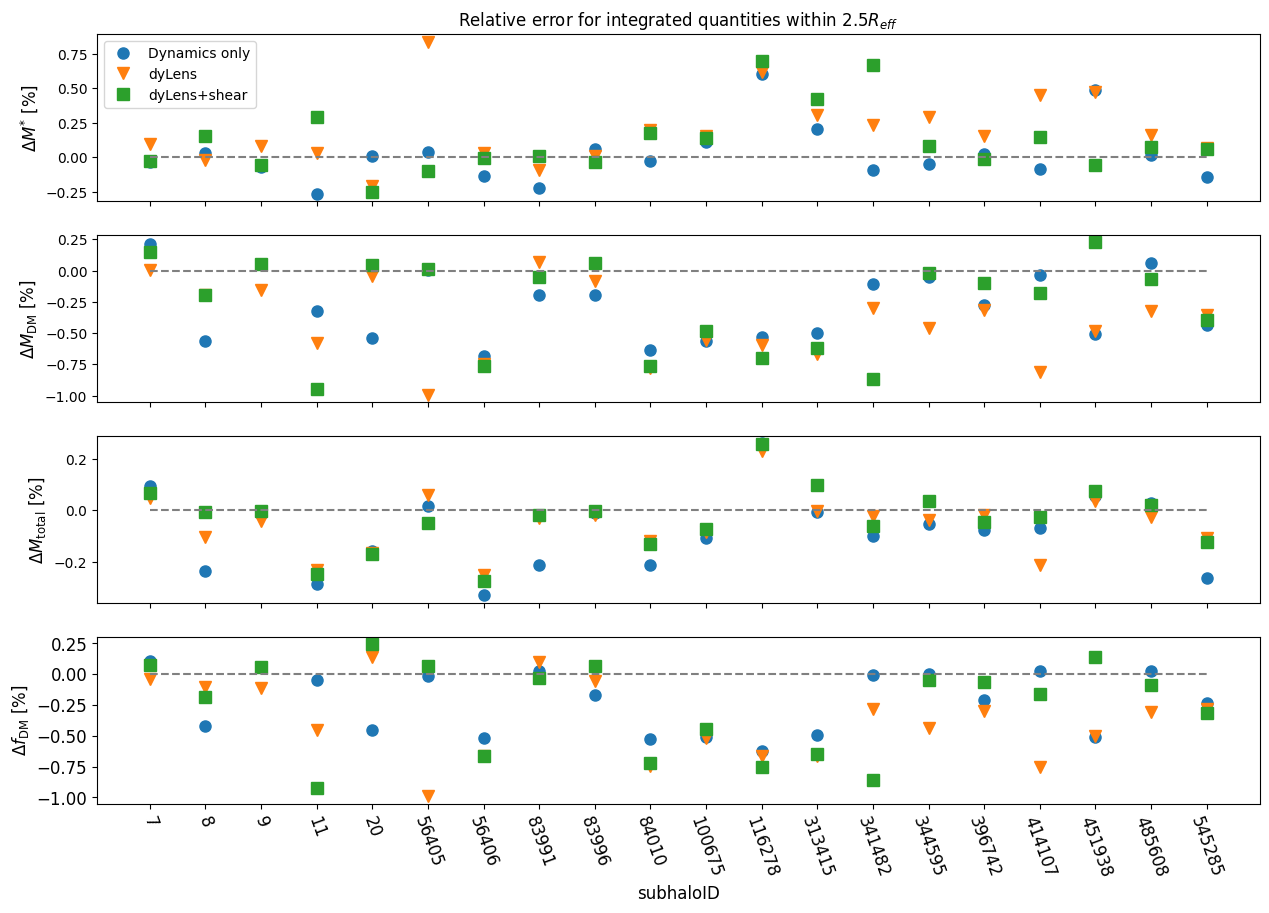

In [14]:
fig, axes = plt.subplots(4, figsize=(15, 10), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]
x = np.arange(0, Nsubhalos, 1)   # just to plot


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results_3D[i][:,0], "o", label="Dynamics only", markersize=8)
    ax.plot(x, results_3D[i][:,1], "v", label="dyLens", markersize=8)
    ax.plot(x, results_3D[i][:,2], "s", label="dyLens+shear", markersize=8)
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${2.5 R_{eff}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

---

# R$_{\text{Einstein}}$

In [15]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos

    # intrinsic
Dstar  = np.empty([Nsubhalos,3])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,3])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,3])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,3])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction

In [16]:
    # Where to store the results
MMstar_dyLens = np.empty([Nsubhalos, 3])        # dyLens measurement of stellar mass
MMstar_dyLens_shear = np.empty([Nsubhalos, 3])  # dyLens+shear measurement of stellar mass

MMtotal_dyLens = np.empty([Nsubhalos, 3])       # dyLens measurement of total mass 
MMtotal_dyLens_shear = np.empty([Nsubhalos, 3]) # dyLens+shear measurement of total mass 

MMdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter mass
MMdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter mass

MMfdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter fraction
MMfdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter fraction

In [17]:
for i, idNum in enumerate(subhalos):
    
    with open("./{}/model1/no_shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()

    with open("./{}/model1/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        dyLens_shear = json.load(f)
        f.close()
    
    Dstar[i][1] = dyLens["Dstar"]
    Dstar[i][2] = dyLens_shear["Dstar"]
    
    Ddm[i][1] = dyLens["Ddm"]
    Ddm[i][2] = dyLens_shear["Ddm"]
    
    Dtotal[i][1] = dyLens["Dtotal"]
    Dtotal[i][2] = dyLens_shear["Dtotal"]
    
    Dfdm[i][1] = dyLens["Dfdm"]
    Dfdm[i][2] = dyLens_shear["Dfdm"]    
    
    Mstar[i]  = dyLens["Mstar"]
    Mdm[i]    = dyLens["Mdm"]
    Mtotal[i] = dyLens["Mtotal"] 
    Mfdm[i]   = dyLens["fdm"]
    
    MMstar_dyLens[i] = dyLens["MMstar"]
    MMstar_dyLens_shear[i] = dyLens_shear["MMstar"]
    
    MMtotal_dyLens[i] = dyLens["MMtotal"]
    MMtotal_dyLens_shear[i] = dyLens_shear["MMtotal"]
    
    MMdm_dyLens[i] = dyLens["MMdm"]
    MMdm_dyLens_shear[i] = dyLens_shear["MMdm"]
    
    MMfdm_dyLens[i] = dyLens["Mfdm"]
    MMfdm_dyLens_shear[i] = dyLens_shear["Mfdm"]

In [26]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

def make_plot(dataset_true, dataset_dyLens, dataset_dyLens_shear,
                 diff_dataset,
                 title, label, fdm=False):

    plt.figure(figsize=(15,8))
    plt.suptitle(title, fontsize=14)

    plt.subplot(121)
    MM_dyLens_u       = np.diff(dataset_dyLens, axis=1)
    MM_dyLens_shear_u = np.diff(dataset_dyLens_shear, axis=1)

    plt.scatter(x=dataset_true, y=dataset_dyLens[:,1], s=10, color="orange", label="dyLens")
    plt.errorbar(x=dataset_true, y=dataset_dyLens[:,1], yerr=MM_dyLens_u.T, ls="None", color="orange")

    plt.scatter(x=dataset_true, y=dataset_dyLens_shear[:,1], s=10, color="green", label="dyLens+shear")
    plt.errorbar(x=dataset_true, y=dataset_dyLens_shear[:,1], yerr=MM_dyLens_shear_u.T, ls="None", color="green")

    r = np.linspace(dataset_true.min(), dataset_true.max())
    plt.plot(r, r, color="gray", linestyle="--")

    plt.legend(fontsize=13)
    if fdm:
        plt.xlabel(r"Input $f_{DM}$",  size=14)
        plt.ylabel(r"Output $f_{DM}$",  size=14)
    else:       
        plt.xlabel(r"Input [${\log_{10}(M/M_{\odot})}]$",  size=14)
        plt.ylabel(r"Output [${\log_{10}(M/M_{\odot})}]$",  size=14)



    plt.subplot(122)
    m, hi, lo = median_hi_lo(diff_dataset[:,1])
    _ = plt.hist(diff_dataset[:,1], bins=5, density=False, alpha=0.8, color="orange",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    m, hi, lo = median_hi_lo(diff_dataset[:,2])
    _ = plt.hist(diff_dataset[:,2], bins=5, density=False, alpha=0.8, color="green",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    plt.legend(fontsize=13)
    plt.xlabel(label, size=14)
    plt.ylabel("#Number of subhalos", size=14)

    plt.xticks(size=12)
    plt.yticks(size=12)


    plt.tight_layout()

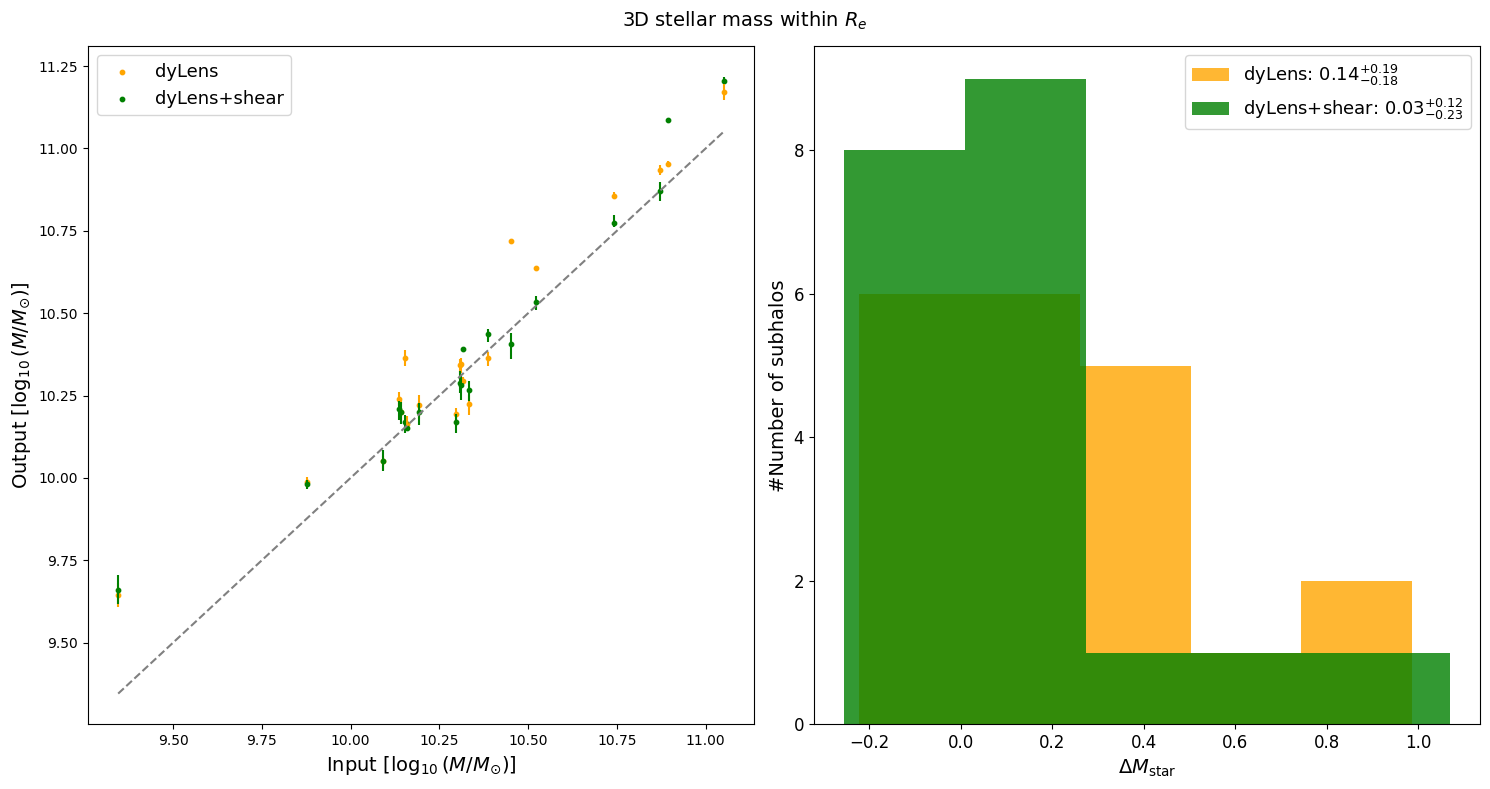

In [27]:
    # Stellar mass plot
make_plot(dataset_true=Mstar,
          dataset_dyLens=MMstar_dyLens, 
          dataset_dyLens_shear=MMstar_dyLens_shear,
          diff_dataset=Dstar,
         title=r"3D stellar mass within $R_{e}$", label=r"${\Delta M_{\rm star}}$")

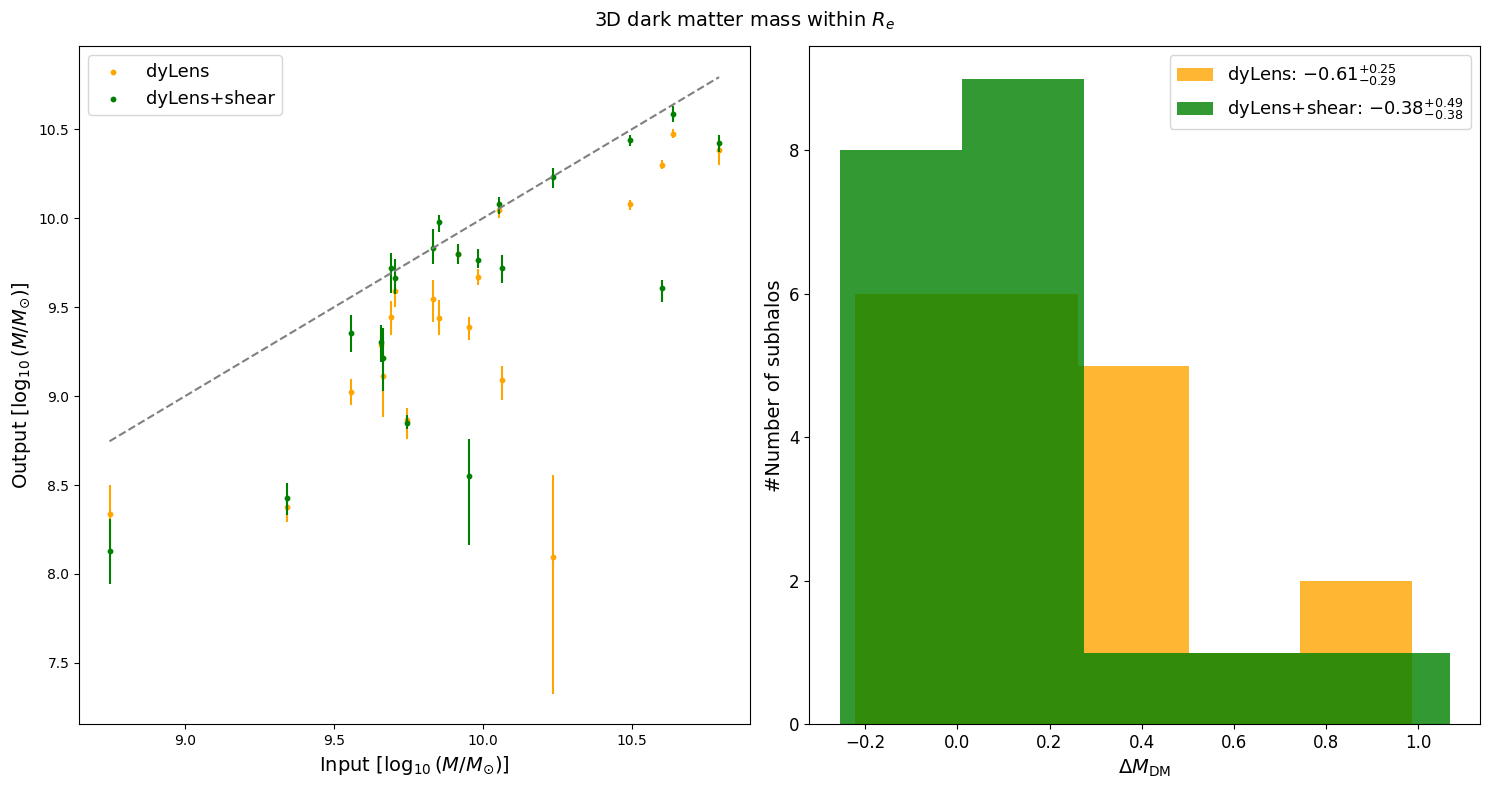

In [20]:
    # Dark matter mass
make_plot(dataset_true=Mdm,
          dataset_dyLens=MMdm_dyLens,
          dataset_dyLens_shear=MMdm_dyLens_shear,
          diff_dataset=Ddm,
         title=r"3D dark matter mass within $R_{e}$", label=r"${\Delta M_{\rm DM}}$")

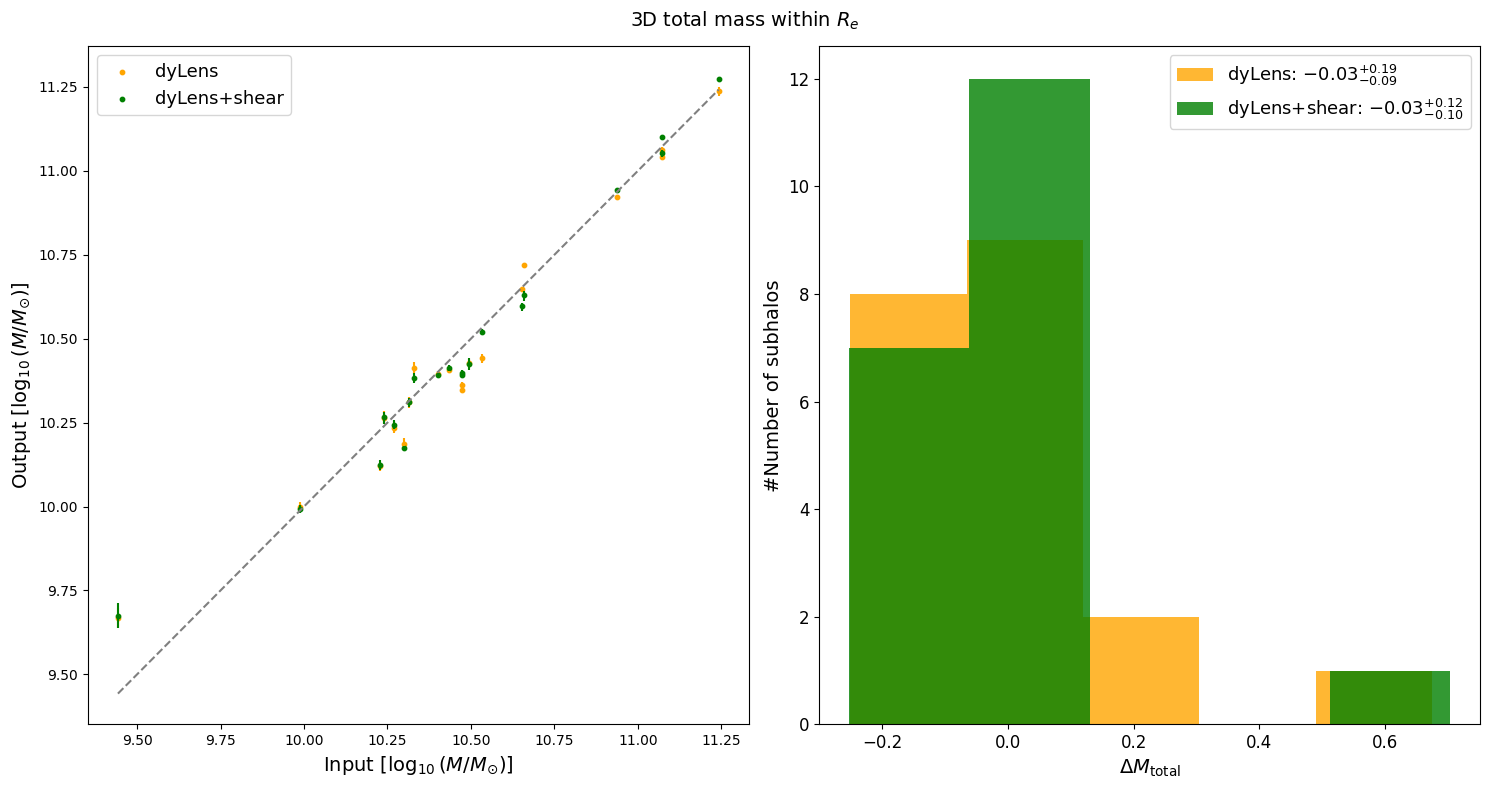

In [28]:
    # Total mass
make_plot(dataset_true=Mtotal,
          dataset_dyLens=MMtotal_dyLens,
          dataset_dyLens_shear=MMtotal_dyLens_shear,
          diff_dataset=Dtotal,
         title=r"3D total mass within $R_{e}$", label=r"${\Delta M_{\rm total}}$")

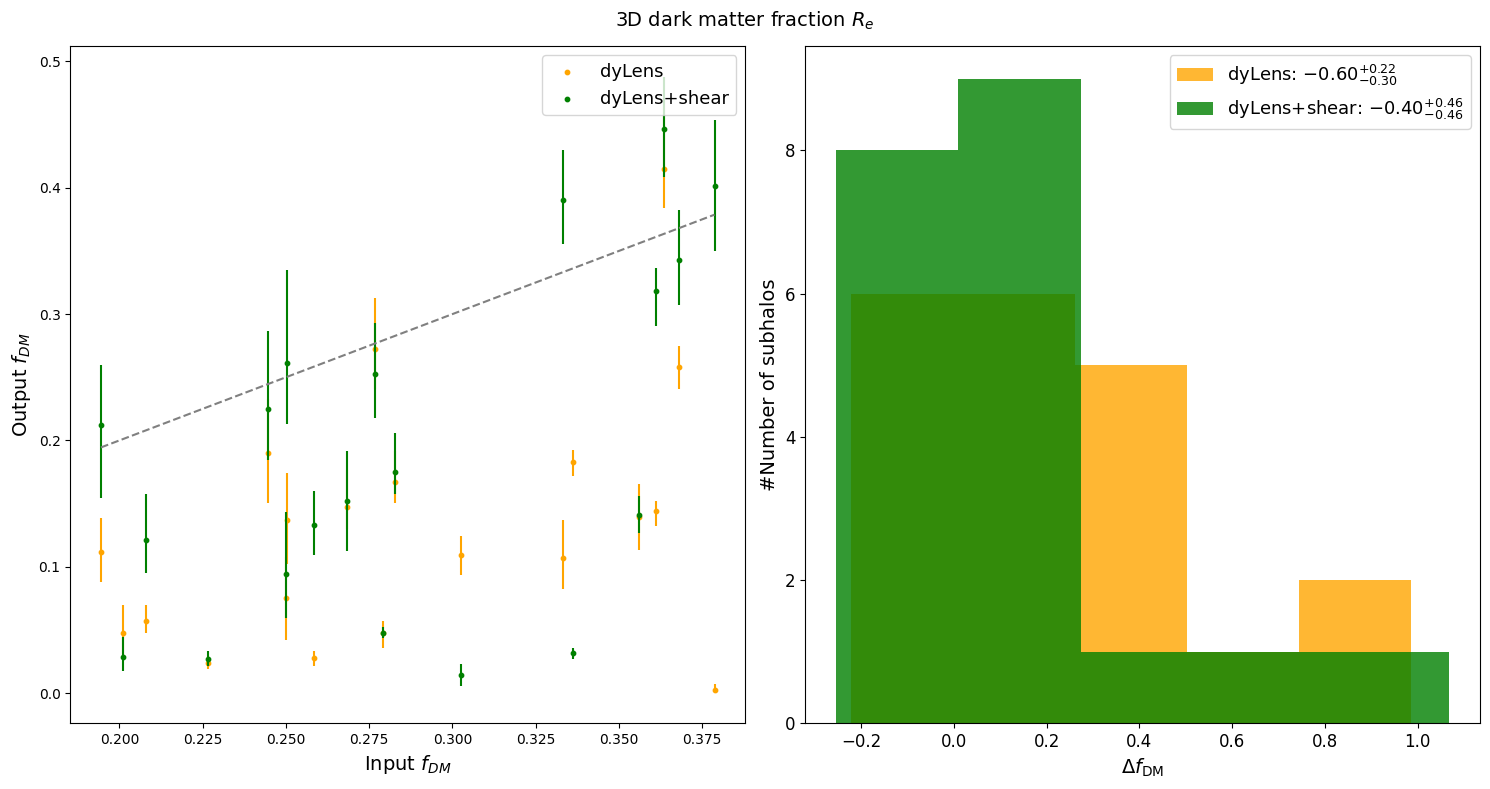

In [22]:
    # Dark matter fraction
make_plot(dataset_true=Mfdm,
          dataset_dyLens=MMfdm_dyLens,
          dataset_dyLens_shear=MMfdm_dyLens_shear,
          diff_dataset=Dfdm,
         title=r"3D dark matter fraction $R_{e}$", label=r"${\Delta f_{\rm DM}}$", fdm=True)

In [24]:
results_3D = np.stack([Dstar, Ddm, Dtotal, Dfdm])

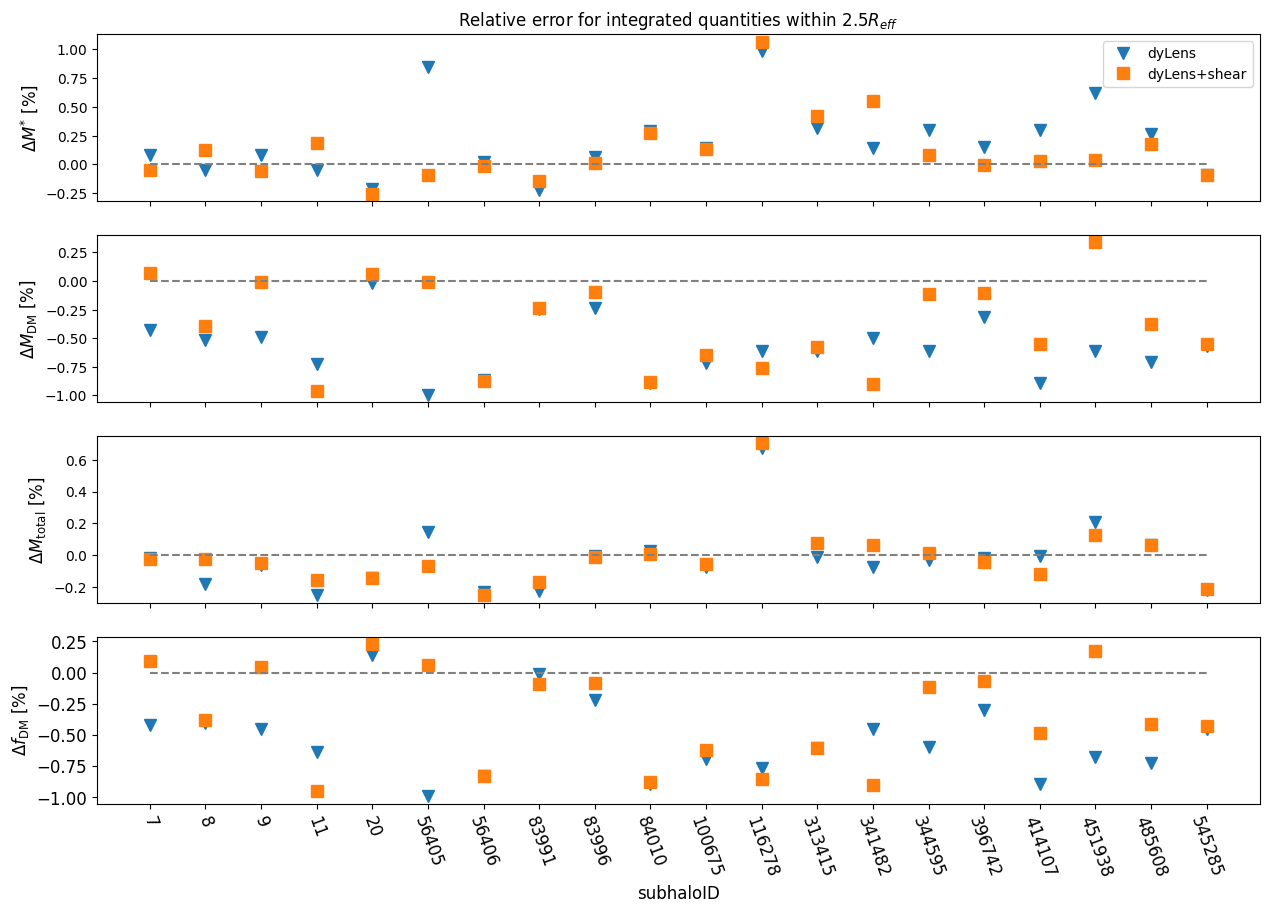

In [25]:
fig, axes = plt.subplots(4, figsize=(15, 10), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]
x = np.arange(0, Nsubhalos, 1)   # just to plot


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results_3D[i][:,1], "v", label="dyLens", markersize=8)
    ax.plot(x, results_3D[i][:,2], "s", label="dyLens+shear", markersize=8)
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${2.5 R_{eff}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

----